# Working with FITS files

In [2]:
import numpy as np
# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits
import glob

In [3]:
fitsfiles = sorted(glob.glob("data/*fits"))

## read in one fitsfile

In [4]:
hdu_list =  fits.open(fitsfiles[0])
hdu_list.info()

Filename: data/L246309-SB098-UV50_250_natural-I-image_reweighted.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (1500, 1500, 1, 1)   float32   


To see the entire header as it appears in the FITS file (with the END card and padding stripped), simply enter the header object by itself, or print(repr(hdr)):

In [7]:
hdu_list[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    4 / number of data axes                            
NAXIS1  =                 1500 / length of data axis 1                          
NAXIS2  =                 1500 / length of data axis 2                          
NAXIS3  =                    1 / length of data axis 3                          
NAXIS4  =                    1 / length of data axis 4                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BSCALE  =                   1.                                                  
BZERO   =                   0.                                                  
BUNIT   = 'JY/BEAM '        

# If an HDU’s data is an image, the data attribute of the HDU object will return a numpy ndarray object.

In [5]:
data = hdu_list[0].data
print(np.min(data),np.max(data))
print (data.shape)

-0.08012231 0.069010854
(1, 1, 1500, 1500)


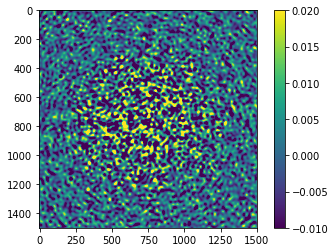

In [9]:
fig,ax=plt.subplots()
plt.imshow(data.squeeze(),vmin=-0.01,vmax=0.02)
plt.colorbar()

# Now lets add some meaning full axes

## we need the astropy wcs package

In [11]:
from astropy import wcs

In [21]:
mywcs=wcs.WCS(hdu_list[0].header)
mywcs.celestial


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 0.0  90.0  
CRPIX : 751.0  751.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00833333333333333  0.00833333333333333  
NAXIS : 1500  1500  1  1

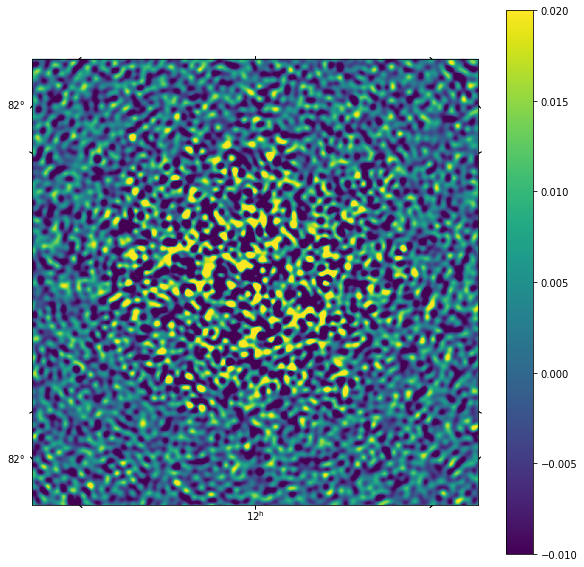

In [23]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=mywcs.celestial)

plt.imshow(data.squeeze(),vmin=-0.01,vmax=0.02)
plt.colorbar()

Ok, this is NCP data so the axes look a bit weird

We would like to combine the fits files of all frequencies into a single data cube

Creating a New Image File

So far we have demonstrated how to read and update an existing FITS file. But how about creating a new FITS file from scratch? Such tasks are very easy in Astropy for an image HDU. We’ll first demonstrate how to create a FITS file consisting only the primary HDU with image data.

First, we create a numpy object for the data part, concatenate the data over the frequency axis

In [57]:
data = np.concatenate([fits.getdata(i) for i in fitsfiles],axis=1)
data.shape

(1, 67, 1500, 1500)

Next, we create a PrimaryHDU object to encapsulate the data:

In [58]:
hdu = fits.PrimaryHDU(data)


We then create a HDUList to contain the newly created primary HDU, and write to a new file:

In [59]:
hdul = fits.HDUList([hdu])
hdul.writeto('new1.fits')

OSError: File 'new1.fits' already exists.

In [60]:
fits.getheader('new1.fits')

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                 1500                                                  
NAXIS2  =                 1500                                                  
NAXIS3  =                   67                                                  
NAXIS4  =                    1                                                  
EXTEND  =                    T                                                  

We need to put in a more meaning full header. Let's copy it from the original file

In [61]:
header =  fits.getheader(fitsfiles[0])

In [62]:
header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    4 / number of data axes                            
NAXIS1  =                 1500 / length of data axis 1                          
NAXIS2  =                 1500 / length of data axis 2                          
NAXIS3  =                    1 / length of data axis 3                          
NAXIS4  =                    1 / length of data axis 4                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BSCALE  =                   1.                                                  
BZERO   =                   0.                                                  
BUNIT   = 'JY/BEAM '        

# Add to the history field

In [63]:
header['history'] ='Created 2019-03-12, concatenation of NCP SB files'

In [64]:
header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    4 / number of data axes                            
NAXIS1  =                 1500 / length of data axis 1                          
NAXIS2  =                 1500 / length of data axis 2                          
NAXIS3  =                    1 / length of data axis 3                          
NAXIS4  =                    1 / length of data axis 4                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BSCALE  =                   1.                                                  
BZERO   =                   0.                                                  
BUNIT   = 'JY/BEAM '        

In [65]:
hdu = fits.PrimaryHDU(data,header=header)


In [68]:
hdu.writeto('new3.fits')

In [69]:
fits.getheader('new3.fits')

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                 1500                                                  
NAXIS2  =                 1500                                                  
NAXIS3  =                   67                                                  
NAXIS4  =                    1                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BUNIT   = 'JY/BEAM '           / Units are in Jansky per beam                   
BMAJ    =     0.15283639683011                                                  
BMIN    =    0.149672230572736                                                  
BPA     =     61.43953694442